**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 7**
Análisis de Componentes Principales (PCA)

---

**Equipo 21**

A01795568 - Martin Jurado Pedroza

A01550176 - Juan Carlos Olivier Jasso

A01795639 - Lineth Del Carmen Guerra Camarena

A00954533 - Erick Rosales Alvarez

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
cereals_df = pd.read_csv('data/Cereals.csv')
cereals_df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301
74,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.592193


In [3]:
cereals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     76 non-null     float64
 9   sugars    76 non-null     float64
 10  potass    75 non-null     float64
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(7), int64(6), object(3)
memory usage: 9.8+ KB


# **Parte 1**. EDA y preprocesamiento

1. Obtén estadísticas descriptivas para todas las variables del dataframe. 

In [4]:
# Estadísticas descriptivas para variables numéricas
numeric_stats = cereals_df.describe()

# Estadísticas descriptivas para variables categóricas
categorical_stats = cereals_df.describe(include='object')

# Muestra las estadísticas descriptivas
print("Estadísticas Descriptivas para Variables Numéricas:")
display(numeric_stats)

print("\nEstadísticas Descriptivas para Variables Categóricas:")
display(categorical_stats)

Estadísticas Descriptivas para Variables Numéricas:


,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,76.000000,76.000000,75.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.802632,7.026316,98.666667,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,3.907326,4.378656,70.410636,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,15.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,42.500000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.500000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912



Estadísticas Descriptivas para Variables Categóricas:


,name,mfr,type
count,77,77,77
unique,77,7,2
top,100%_Bran,K,C
freq,1,23,74


Genera algunos gráficos para familiarizarte con el conjunto de datos. Al menos deberás incluir los que te permitan responder los siguientes cuestionamientos:

**Nota.** Debes responder de manera explícita las preguntas, apoyándote de los resultados observados de cada gráfico. 

2a) ¿Cuál es la frecuencia o conteo de cada categoría para las variables: `mfr` y `shelf` (por separado)? 

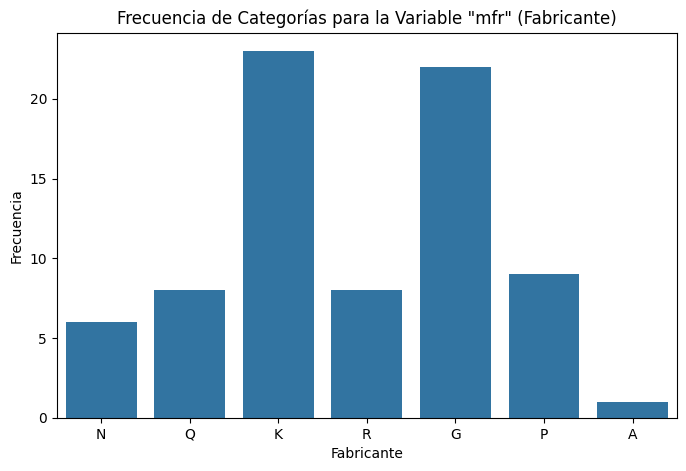

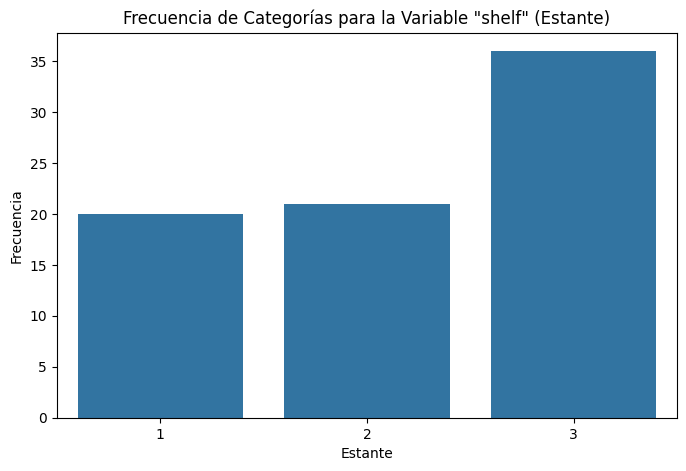

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de barras para la variable 'mfr' (fabricante)
plt.figure(figsize=(8, 5))
sns.countplot(x='mfr', data=cereals_df)
plt.title('Frecuencia de Categorías para la Variable "mfr" (Fabricante)')
plt.xlabel('Fabricante')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico de barras para la variable 'shelf' (estante)
plt.figure(figsize=(8, 5))
sns.countplot(x='shelf', data=cereals_df)
plt.title('Frecuencia de Categorías para la Variable "shelf" (Estante)')
plt.xlabel('Estante')
plt.ylabel('Frecuencia')
plt.show()


In [6]:
# Frecuencia de categorías para la variable 'mfr' (fabricante)
mfr_counts = cereals_df['mfr'].value_counts().reset_index()
mfr_counts.columns = ['Fabricante', 'Frecuencia']
print("Frecuencia de Categorías para la Variable 'mfr' (Fabricante):\n")
print(mfr_counts)

# Frecuencia de categorías para la variable 'shelf' (estante)
shelf_counts = cereals_df['shelf'].value_counts().reset_index()
shelf_counts.columns = ['Estante', 'Frecuencia']
print("\nFrecuencia de Categorías para la Variable 'shelf' (Estante):\n")
print(shelf_counts)

Frecuencia de Categorías para la Variable 'mfr' (Fabricante):

  Fabricante  Frecuencia
0          K          23
1          G          22
2          P           9
3          Q           8
4          R           8
5          N           6
6          A           1

Frecuencia de Categorías para la Variable 'shelf' (Estante):

   Estante  Frecuencia
0        3          36
1        2          21
2        1          20


2b) Combina los resultados previos para observar, de cada fabricante, cuántos productos tiene en cada estante. 

In [7]:
# Agrupación por fabricante y estante y contando la frecuencia
fabricante_estante_counts = cereals_df.groupby(['mfr', 'shelf']).size().reset_index(name='Frecuencia')

# Pivoteando la tabla para tener los fabricantes como índices y los estantes como columnas
fabricante_estante_pivot = fabricante_estante_counts.pivot(index='mfr', columns='shelf', values='Frecuencia').fillna(0).astype(int)

# Mostrando la tabla resultante
print("Número de Productos por Fabricante y Estante:\n")
print(fabricante_estante_pivot)


Número de Productos por Fabricante y Estante:

shelf  1  2   3
mfr            
A      0  1   0
G      6  7   9
K      4  7  12
N      3  2   1
P      2  1   6
Q      1  3   4
R      4  0   4


 3a) ¿Cuál es el rango más frecuente de la variable `rating`?

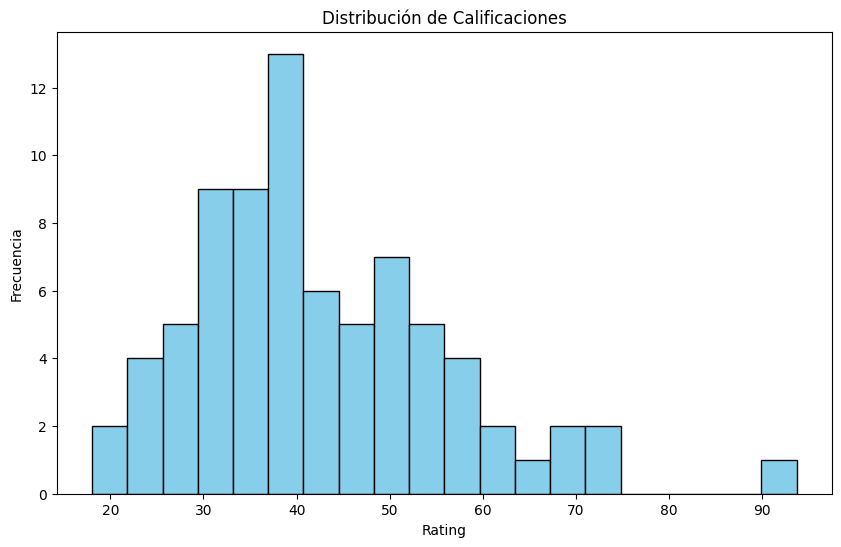

In [8]:
import matplotlib.pyplot as plt

# Histograma para la variable 'rating' con bins
plt.figure(figsize=(10, 6))
plt.hist(cereals_df['rating'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de Calificaciones')
plt.xlabel('Rating')
plt.ylabel('Frecuencia')
plt.show()


Basados en el Histograma el Rango de Rating esta entre 40

In [9]:
# Calcular la moda de la variable 'rating'
moda_rating = cereals_df['rating'].mode()
print("Basado en una análisis de Moda estos son los valores")
# Mostrar la moda de la variable 'rating'
print("La moda de la variable 'rating' es:")
print(moda_rating.tolist())


Basado en una análisis de Moda estos son los valores
La moda de la variable 'rating' es:
[18.042851, 19.823573, 21.871292, 22.396513, 22.736446, 23.804043, 26.734515, 27.753301, 28.025765, 28.592785, 28.742414, 29.509541, 29.924285, 30.313351, 30.450843, 31.072217, 31.230054, 31.435973, 32.207582, 33.174094, 33.983679, 34.139765, 34.384843, 35.252444, 35.782791, 36.176196, 36.187559, 36.471512, 36.523683, 37.038562, 37.136863, 37.840594, 38.839746, 39.106174, 39.241114, 39.259197, 39.7034, 40.105965, 40.400208, 40.448772, 40.560159, 40.69232, 40.917047, 41.015492, 41.445019, 41.50354, 41.998933, 44.330856, 45.328074, 45.811716, 45.863324, 46.658844, 46.895644, 49.120253, 49.511874, 49.787445, 50.764999, 50.828392, 51.592193, 52.076897, 53.131324, 53.313813, 53.371007, 54.850917, 55.333142, 58.345141, 59.363993, 59.425505, 59.642837, 60.756112, 63.005645, 64.533816, 68.235885, 68.402973, 72.801787, 74.472949, 93.704912]


In [10]:
# Contar la frecuencia de cada valor en la variable 'rating' y ordenar de forma descendente
rating_frequencies_sorted = cereals_df['rating'].value_counts().sort_index(ascending=False)

# Mostrar las frecuencias ordenadas de cada valor en 'rating'
print("Frecuencias de cada valor en la variable 'rating' (orden descendente):\n")
print(rating_frequencies_sorted)


Frecuencias de cada valor en la variable 'rating' (orden descendente):

rating
93.704912    1
74.472949    1
72.801787    1
68.402973    1
68.235885    1
            ..
22.736446    1
22.396513    1
21.871292    1
19.823573    1
18.042851    1
Name: count, Length: 77, dtype: int64


3b) ¿Cuáles son los 10 cereales mejor evaluados y a qué fabricante corresponden? 

In [11]:
# Ordenar el DataFrame por la columna 'rating' de forma descendente
top_10_cereales = cereals_df.sort_values(by='rating', ascending=False).head(10)

# Mostrar los 10 cereales mejor evaluados y su fabricante
print("Los 10 cereales mejor evaluados y sus fabricantes son:\n")
print(top_10_cereales[['name', 'rating', 'mfr']])


Los 10 cereales mejor evaluados y sus fabricantes son:

                         name     rating mfr
3   All-Bran_with_Extra_Fiber  93.704912   K
64     Shredded_Wheat_'n'Bran  74.472949   N
65  Shredded_Wheat_spoon_size  72.801787   N
0                   100%_Bran  68.402973   N
63             Shredded_Wheat  68.235885   N
20     Cream_of_Wheat_(Quick)  64.533816   N
55               Puffed_Wheat  63.005645   Q
54                Puffed_Rice  60.756112   Q
50          Nutri-grain_Wheat  59.642837   K
2                    All-Bran  59.425505   K


4a) Compara la distribución de las calorías según el fabricante, por medio de boxplots. 

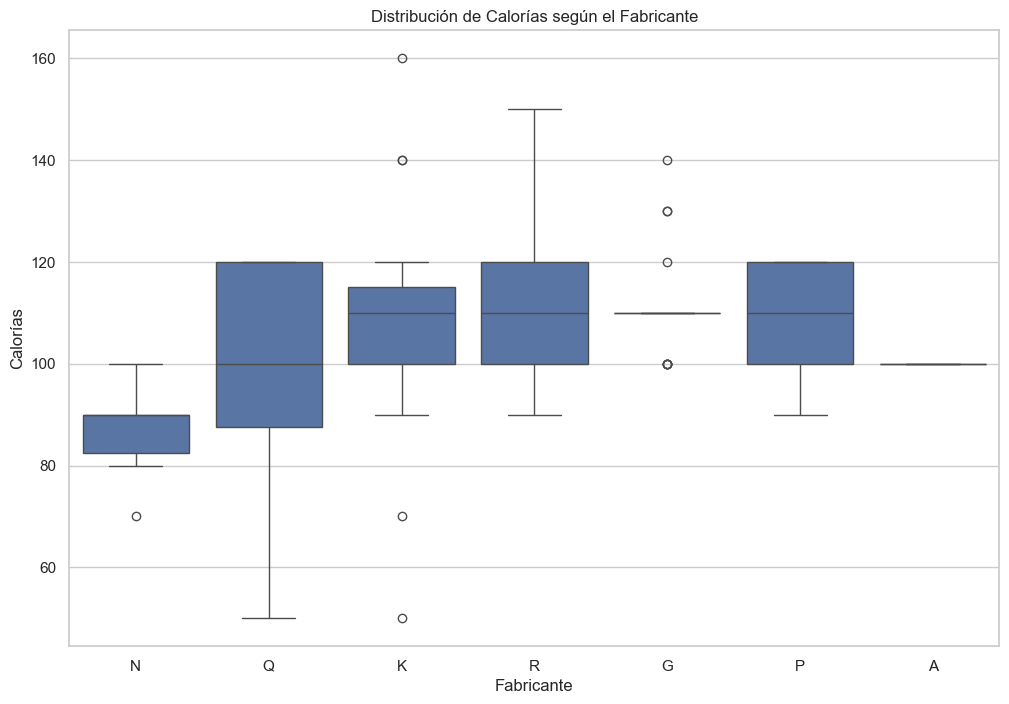

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# Crear el boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='mfr', y='calories', data=cereals_df)

# Añadir etiquetas y título
plt.xlabel('Fabricante')
plt.ylabel('Calorías')
plt.title('Distribución de Calorías según el Fabricante')

# Mostrar el boxplot
plt.show()

4b) ¿Cuáles son las dos variables que tienen mayor correlación con `rating`? 

In [13]:
# Seleccionar solo columnas numéricas
numeric_columns = cereals_df.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
correlation_matrix = numeric_columns.corr()

# Encontrar las dos variables con mayor correlación (positiva o negativa) con 'rating'
top_correlations = correlation_matrix['rating'].abs().sort_values(ascending=False)[1:3]

# Mostrar las dos variables con mayor correlación
print("Las dos variables con mayor correlación (positiva o negativa) con 'rating' son:\n")
print(top_correlations)


Las dos variables con mayor correlación (positiva o negativa) con 'rating' son:

sugars      0.763902
calories    0.689376
Name: rating, dtype: float64


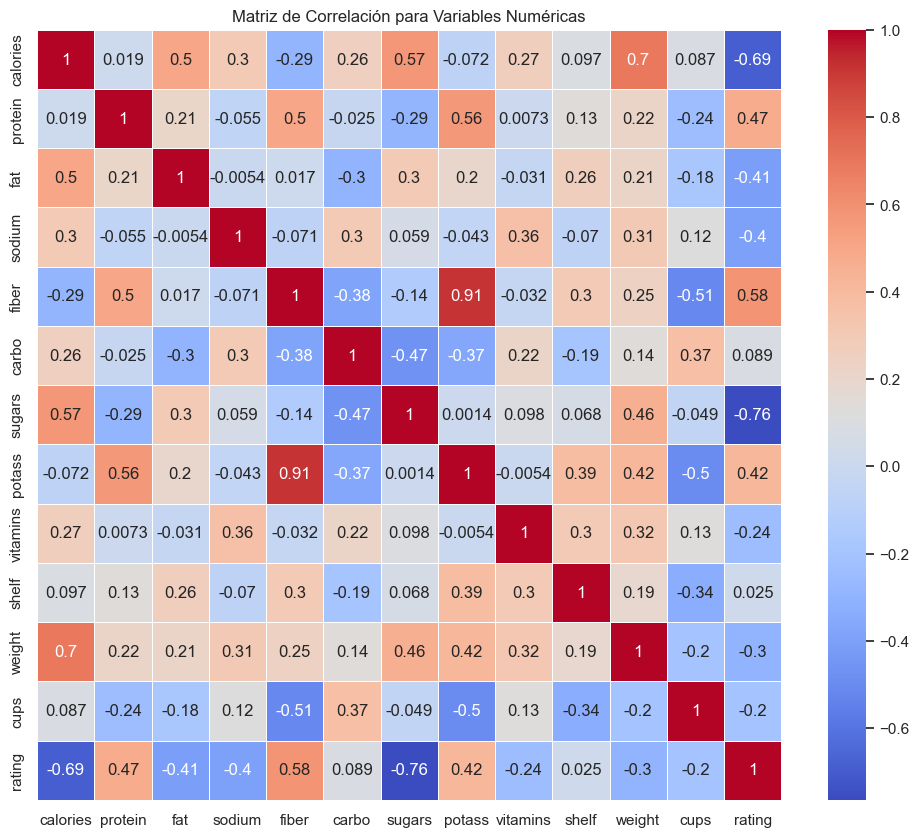

In [14]:
# Seleccionar solo las columnas numéricas
numeric_columns = cereals_df.select_dtypes(include=[np.number])

# Calcular la matriz de correlación para las variables numéricas
correlation_matrix_all = numeric_columns.corr()

# Configurar el estilo de Seaborn
sns.set(style="white")

# Crear el heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_all, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Matriz de Correlación para Variables Numéricas')
plt.show()


5. Elimina todos los registros con algún dato faltante y reinicia el índice del dataframe para que quede con valores consecutivos. 

In [15]:
# Eliminar registros con algún dato faltante en el DataFrame original
cereals_df.dropna(inplace=True)

# Reiniciar el índice para que quede con valores consecutivos en el DataFrame original
cereals_df.reset_index(drop=True, inplace=True)

# Mostrar información del DataFrame original después de la limpieza
print("Información del DataFrame después de eliminar registros con datos faltantes:")
print(cereals_df.info())


Información del DataFrame después de eliminar registros con datos faltantes:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      74 non-null     object 
 1   mfr       74 non-null     object 
 2   type      74 non-null     object 
 3   calories  74 non-null     int64  
 4   protein   74 non-null     int64  
 5   fat       74 non-null     int64  
 6   sodium    74 non-null     int64  
 7   fiber     74 non-null     float64
 8   carbo     74 non-null     float64
 9   sugars    74 non-null     float64
 10  potass    74 non-null     float64
 11  vitamins  74 non-null     int64  
 12  shelf     74 non-null     int64  
 13  weight    74 non-null     float64
 14  cups      74 non-null     float64
 15  rating    74 non-null     float64
dtypes: float64(7), int64(6), object(3)
memory usage: 9.4+ KB
None


# **Parte 2**. Ingeniería de características

6. Considerando que `rating` es la variable de salida, almacénala en una variable `y` y separa los predictores **numéricos** en `X`. Escala los valores de `X` y aplica `PCA` para proyectar los datos en el nuevo espacio de vectores. 

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Separar la variable de salida y los predictores numéricos
y = cereals_df['rating']
X = cereals_df.select_dtypes(include=['float64', 'int64']).drop(columns=['rating'])

# Escalar los valores de X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA para reducir la dimensionalidad
num_components = min(X.shape[0], X.shape[1])
pca = PCA(n_components=num_components)
X_pca = pca.fit_transform(X_scaled)
X_pca

array([[ 4.87039945e+00,  2.93423770e+00, -5.52655787e-02,
         2.44647398e-01, -1.10203497e+00,  9.04575058e-01,
        -2.35388469e-01, -2.47786978e-01, -1.24798598e-01,
         4.63312673e-02,  2.38706446e-01,  2.13419227e-02],
       [ 1.76110972e+00, -2.10992893e-01, -3.01405840e+00,
        -4.94129495e-01,  3.27550644e+00,  1.06504119e+00,
         4.89639928e-01,  8.95201062e-01, -8.35394459e-01,
        -5.95071190e-01,  6.99540953e-02, -8.95233091e-02],
       [ 4.72716085e+00,  2.40225446e+00,  8.69027529e-01,
        -9.58226015e-02, -1.35738772e+00,  1.39386087e+00,
        -1.21033982e+00,  1.82089211e-01,  1.39267426e-01,
         9.07759887e-02, -4.88301890e-01, -3.55704815e-02],
       [ 5.14281386e+00,  4.40182602e+00,  1.88315297e+00,
         2.09853821e-01, -1.66238654e+00,  9.55808054e-01,
         2.89694590e-01,  8.65569384e-01, -6.82678015e-01,
         9.93001036e-02,  7.08471201e-01,  1.08197957e-01],
       [-3.32393651e-01, -2.84619125e-01, -1.4909291

7. Obtén la curva del porcentaje de varianza acumulada y determine el número mínimo de componentes principales que explique más del 90% de la varianza. Imprime la información de dichos componentes. 

Varianza Explicada por cada Componente:
[0.2766149  0.22059749 0.1488355  0.08479752 0.08202324 0.05748156
 0.05498713 0.03467223 0.02614423 0.00764976 0.0046911  0.00150535]


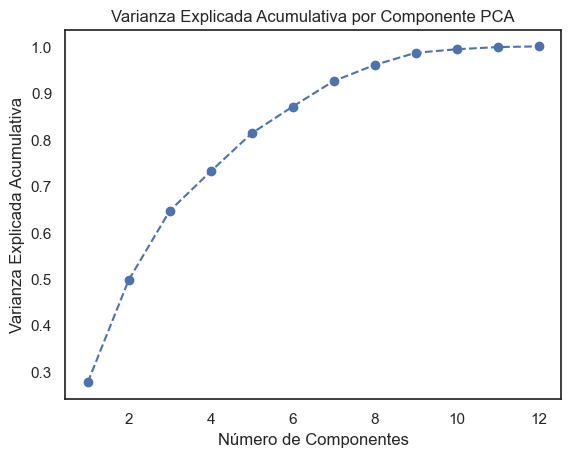

Número mínimo de componentes para explicar más del 90% de la varianza: 7

Información de los primeros componentes principales:
Componente 1: Varianza Explicada = 0.2766
Componente 2: Varianza Explicada = 0.2206
Componente 3: Varianza Explicada = 0.1488
Componente 4: Varianza Explicada = 0.0848
Componente 5: Varianza Explicada = 0.0820
Componente 6: Varianza Explicada = 0.0575
Componente 7: Varianza Explicada = 0.0550


In [17]:
# Mostrar la varianza explicada por cada componente
explained_variance_ratio = pca.explained_variance_ratio_
print("Varianza Explicada por cada Componente:")
print(explained_variance_ratio)

# Graficar la varianza explicada acumulativa
cumulative_explained_variance = explained_variance_ratio.cumsum()
plt.plot(range(1, num_components + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Varianza Explicada Acumulativa por Componente PCA')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulativa')
plt.show()

# Determinar el número mínimo de componentes principales para explicar más del 90% de la varianza
min_components_90_var = np.argmax(cumulative_explained_variance >= 0.90) + 1

# Imprimir la información de los primeros componentes principales
print(f"Número mínimo de componentes para explicar más del 90% de la varianza: {min_components_90_var}")
print("\nInformación de los primeros componentes principales:")
for i in range(min_components_90_var):
    print(f"Componente {i + 1}: Varianza Explicada = {explained_variance_ratio[i]:.4f}")


8. ¿Cuáles son las tres variables más importantes en el cálculo del primer componente?

In [18]:
# Obtener las tres variables más importantes en el cálculo del primer componente
top_three_indices = np.abs(pca.components_[0, :]).argsort()[-3:][::-1]
top_three_variables = X.columns[top_three_indices]
top_three_loadings = pca.components_[0, top_three_indices]

# Imprimir las tres variables más importantes y sus cargas
print("\nLas tres variables más importantes en el cálculo del primer componente son:")
for variable, loading in zip(top_three_variables, top_three_loadings):
    print(f"{variable}: {loading:.4f}")



Las tres variables más importantes en el cálculo del primer componente son:
potass: 0.5026
fiber: 0.4586
cups: -0.3712


9. ¿Todas las variables categóricas son predictores? Aplica una técnica de encoding a las que sí lo sean. Justifica la elección de tu técnica. 

In [19]:
# Asegurarse de que X contiene las columnas 'mfr' y 'type'
X = cereals_df[['mfr', 'type', 'name']]

# Aplicar One-Hot Encoding
X_encoded = pd.get_dummies(X, columns=['mfr', 'type'], drop_first=True)


One-Hot Encoding para mfr y type: Dado que mfr y type tienen un número limitado de categorías únicas, es razonable aplicar One-Hot Encoding a estas variables. Esto generará columnas binarias para cada categoría, lo cual puede ser útil para algoritmos de machine learning.

In [20]:
# Aplicar Label Encoding a la variable categórica 'name'
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X_encoded['name'] = le.fit_transform(X['name'])


Label Encoding para name: Dado que name tiene 77 categorías únicas, aplicar One-Hot Encoding podría resultar en un gran número de columnas adicionales, lo que puede aumentar la complejidad del modelo y requerir más datos para entrenar. En lugar de eso, podrías considerar Label Encoding si hay un orden intrínseco en las categorías. Si no hay un orden, podrías explorar técnicas más avanzadas, como reducción de dimensionalidad o técnicas específicas para datos categóricos con muchas categorías.


10. Conjunta, en un dataframe, las valores proyectados en los componentes seleccionados (mínimo), las transformaciones obtenidas de las variables categóricas que serán predictores y la variable de salida. Almacena el dataframe resultante en archivo. 

In [21]:
# Obtener el número mínimo de componentes necesarios para explicar más del 90% de la varianza
num_min_components = min_components_90_var

# Seleccionar solo las primeras 'num_min_components' columnas de X_pca (proyección de PCA)
X_pca_selected = X_pca[:, :num_min_components]

# Concatenar las proyecciones de PCA con las variables categóricas codificadas y la variable de salida
combined_df = pd.concat([pd.DataFrame(X_pca_selected, columns=[f'PC_{i+1}' for i in range(num_min_components)]),
                        X_encoded,
                        y], axis=1)

# Almacenar el DataFrame resultante en un archivo (por ejemplo, en formato CSV)
combined_df.to_csv('combined_data.csv', index=False)
